<h1>Project: United kingdom Road Accident Data Analysis</h1>

<h2>Inclusive Years: 2019 - 2022</h2>
<h4>Analyst: Lee Ann Tabanao</h4>
<hr>

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

In [2]:
accident = pd.read_csv('datasets//uk_road_accident.csv')

accident

In [3]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [4]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mode()[0])
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mode()[0])
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna('unaccounted')
accident['Road_Type'] = accident['Road_Type'].fillna('unaccounted')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna('unaccounted')

In [5]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

In [6]:
accident['Accident_Severity'] =  accident['Accident_Severity'].astype('category')
accident['Light_Conditions'] = accident['Light_Conditions'].astype('category')
accident['District Area'] = accident['District Area'].astype('category')
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].astype('category')
accident['Road_Type'] = accident['Road_Type'].astype('category')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].astype('category')
accident['Weather_Conditions'] = accident['Weather_Conditions'].astype('category')
accident['Vehicle_Type'] = accident['Vehicle_Type'].astype('category')

In [7]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   Index                    660679 non-null  object  
 1   Accident_Severity        660679 non-null  category
 2   Accident Date            660679 non-null  object  
 3   Latitude                 660679 non-null  float64 
 4   Light_Conditions         660679 non-null  category
 5   District Area            660679 non-null  category
 6   Longitude                660679 non-null  float64 
 7   Number_of_Casualties     660679 non-null  int64   
 8   Number_of_Vehicles       660679 non-null  int64   
 9   Road_Surface_Conditions  660679 non-null  category
 10  Road_Type                660679 non-null  category
 11  Urban_or_Rural_Area      660679 non-null  category
 12  Weather_Conditions       660679 non-null  category
 13  Vehicle_Type             660679 non-null  ca

In [8]:
accident['Accident Date'] = accident['Accident Date'].str.strip()
accident['Accident Date'] = accident['Accident Date'].astype('str')
accident['Accident Date'] = accident['Accident Date'].str.replace('/', '-')
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst = True, errors = 'coerce')

In [9]:
accident['Year'] = accident['Accident Date'].dt.year
accident['Month'] = accident['Accident Date'].dt.month
accident['Day'] = accident['Accident Date'].dt.day
accident['DayOfWeek'] = accident['Accident Date'].dt.dayofweek

In [10]:
accident.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                 category
District Area                    category
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
Year                                int32
Month                               int32
Day                                 int32
DayOfWeek                           int32
dtype: object

In [11]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Year                       0
Month                      0
Day                        0
DayOfWeek                  0
dtype: int64

In [12]:
accident.describe()

,Accident Date,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Year,Month,Day,DayOfWeek
count,660679,660679.000000,660679.000000,660679.000000,660679.000000,660679.000000,660679.000000,660679.000000,660679.000000
mean,2020-11-30 08:30:32.761749760,52.553862,-1.431193,1.357040,1.831255,2020.409090,6.607965,15.581350,3.111195
min,2019-01-01 00:00:00,49.914430,-7.516225,1.000000,1.000000,2019.000000,1.000000,1.000000,0.000000
25%,2019-11-27 00:00:00,51.490696,-2.332191,1.000000,1.000000,2019.000000,4.000000,8.000000,1.000000
50%,2020-11-13 00:00:00,52.315755,-1.411613,1.000000,2.000000,2020.000000,7.000000,16.000000,3.000000
75%,2021-11-17 00:00:00,53.453444,-0.232901,1.000000,2.000000,2021.000000,10.000000,23.000000,5.000000
max,2022-12-31 00:00:00,60.757544,1.762010,68.000000,32.000000,2022.000000,12.000000,31.000000,6.000000
std,NaN,1.406896,1.383305,0.824847,0.715269,1.109152,3.420701,8.764863,1.927284


In [13]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,6,5,2
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,7,2,1
2,200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,unaccounted,Urban,unaccounted,Taxi/Private hire car,2019,8,26,0
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,8,16,4
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,unaccounted,Urban,unaccounted,Other vehicle,2019,9,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,2022-02-18,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2022,2,18,4
660675,201091NM01881,Slight,2022-02-21,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,21,0
660676,201091NM01935,Slight,2022-02-23,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,23,2
660677,201091NM01964,Serious,2022-02-23,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,2022,2,23,2


<h1>Question #1</h1>
<h3> Which district area records the highest number of fatal accidents?</h3>

In [14]:
fatal = accident[accident['Accident_Severity'] == 'Fatal'].value_counts('District Area')

In [15]:
fatal

District Area
Birmingham                  105
Leeds                        93
Highland                     88
East Riding of Yorkshire     85
Bradford                     71
                           ... 
Orkney Islands                2
Havant                        2
Stevenage                     1
Clackmannanshire              1
Harlow                        1
Name: count, Length: 422, dtype: int64

<h1>Insight 1</h1>
<h3>This suggests that large urban centers like Birmingham and Leeds tend to have more fatal accidents, likely due to higher traffic density, population, and road network complexity. Meanwhile, smaller districts or less densely populated areas record very few fatal accidents.</h3>
<hr>

<h2>Question #2</h2>
<h3>Which vehicle type is most frequently involved in serious accidents?</h3>

In [16]:
seracc = accident[accident['Accident_Severity'] == 'Serious'].value_counts('Vehicle_Type')

In [17]:
seracc

Vehicle_Type
Car                                      66461
Van / Goods 3.5 tonnes mgw or under       4554
Motorcycle over 500cc                     3457
Bus or coach (17 or more pass seats)      3373
Goods 7.5 tonnes mgw and over             2321
Motorcycle 125cc and under                2031
Taxi/Private hire car                     1771
Motorcycle 50cc and under                 1014
Motorcycle over 125cc and up to 500cc     1014
Goods over 3.5t. and under 7.5t            857
Other vehicle                              767
Agricultural vehicle                       282
Minibus (8 - 16 passenger seats)           276
Pedal cycle                                 39
Data missing or out of range                 0
Ridden horse                                 0
Name: count, dtype: int64

<h1>Insight 2</h1>
<h3>Cars dominate serious accident numbers due to their high usage. Cars are the most frequently involved in serious accidents (66,461 cases), followed by vans and motorcycles. This reflects their dominance on the roads but also highlights motorcycles’ higher risk compared to their smaller share of traffic.</h3>
<hr>

<h2>Question #3</h2>
<h3>What percentage of accidents occurred in daylight versus darkness?</h3>

In [18]:
accident['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       484880
Darkness - lights lit          129335
Darkness - no lighting          37437
Darkness - lighting unknown      6484
Darkness - lights unlit          2543
Name: count, dtype: int64

<h1>Insight 3</h1>
<h3>Most accidents occur in daylight (73.4%), compared to lit darkness (19.6%) and much fewer in unlit or poorly lit darkness (7.1% combined).</h3>

<h1>Insight 3.1</h1>
<h3>The majority of accidents happen during daylight, likely due to higher traffic volumes, but darkness significantly increases accident risk relative to exposure.</h3>
<hr>

<h2>Question #4</h2>
<h3>Which light condition is most associated with serious accidents</h3>

In [19]:
accident[accident['Accident_Severity'] == 'Serious'].value_counts('Light_Conditions')

Light_Conditions
Daylight                       60759
Darkness - lights lit          19130
Darkness - no lighting          7174
Darkness - lighting unknown      794
Darkness - lights unlit          360
Name: count, dtype: int64

<h1>Insight 4</h1>
<h3>Serious accidents are most common in daylight (60,759), followed by darkness with lights lit (19,130). While daylight has the highest absolute number of serious accidents, darkness still contributes heavily, suggesting visibility remains a critical factor in accident severity.</h3>
<hr>

<h2>Question #5</h2>
<h3>Are wet or icy roads more likely to cause severe accidents?
</h3>

In [20]:
wet = accident[accident['Road_Surface_Conditions'] == 'Wet or damp'].value_counts('Accident_Severity')
icy = accident[accident['Road_Surface_Conditions'] == 'Frost or ice'].value_counts('Accident_Severity')
snow = accident[accident['Road_Surface_Conditions'] == 'Snow'].value_counts('Accident_Severity')

In [21]:
wet

Accident_Severity
Slight     160303
Serious     23785
Fatal        2620
Name: count, dtype: int64

In [23]:
icy

Accident_Severity
Slight     16317
Serious     2007
Fatal        193
Name: count, dtype: int64

In [25]:
snow

Accident_Severity
Slight     5290
Serious     565
Fatal        35
Name: count, dtype: int64

<h1>Insight 5</h1>
<h3>Wet roads lead to the highest total number of accidents, the relative severity (serious and fatal percentages) is highest on wet and icy roads.
Snow appears less deadly, potentially due to driver caution and fewer vehicles on the road.</h3>
<hr>

<h2>Question #6</h2>
<h3>Which district experiences the most accidents in foggy conditions?</h3>

In [27]:
fog = accident[accident['Weather_Conditions'] == 'Fog or mist']
fog['District Area'].value_counts().head(10)

District Area
Birmingham                  37
East Riding of Yorkshire    34
Bradford                    33
Huntingdonshire             32
Milton Keynes               27
South Cambridgeshire        27
East Lindsey                27
County Durham               27
North Kesteven              27
Leeds                       26
Name: count, dtype: int64

<h1>Insight 6</h1>
<h3>Birmingham, East Riding of Yorkshire, and Bradford report the highest number of accidents under fog or mist. These areas may have higher traffic volumes or geographical/topographical features (such as valleys prone to fog) that increase accident risks in poor visibility conditions.</h3>
<hr>

<h2>Question #7</h2>
<h3>What road type has the highest accident frequency?</h3>

In [28]:
accident['Road_Type'].value_counts()

Road_Type
Single carriageway    492143
Dual carriageway       99424
Roundabout             43992
One way street         13559
Slip road               7041
unaccounted             4520
Name: count, dtype: int64

<h1>Insight 7</h1>
<h3>Single carriageways carry the greatest risk, likely due to their widespread use and mixed traffic flows compared to more controlled motorways.</h3>
<hr>

<h2>Question #8</h2>
<h3>How does accident severity differ between urban and rural areas?</h3>

In [29]:
accident.groupby('Urban_or_Rural_Area')['Accident_Severity'].value_counts()

Urban_or_Rural_Area  Accident_Severity
Rural                Slight               196077
                     Serious               37312
                     Fatal                  5601
Unallocated          Slight                   10
                     Serious                   1
                     Fatal                     0
Urban                Slight               367714
                     Serious               50904
                     Fatal                  3060
Name: count, dtype: int64

<h1>Insight 8</h1>
<h3>Urban areas: 367,714 slight, 50,904 serious, 3,060 fatal.</h3>
<h3>Rural areas: 196,077 slight, 37,312 serious, 5,601 fatal.</h3>
    
<h3>Urban areas see more accidents overall, but rural areas record a higher proportion of fatal accidents, suggesting speed and emergency response challenges in rural settings.</h3>
<hr>

<h2>Question #9</h2>
<h3>What is the overall distribution of accident severities (Fatal, Serious, Slight)?</h3>

In [30]:
accident['Accident_Severity'].value_counts()

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

<h1>Insight 9</h1>
<h3>The majority of accidents are slight (over 560k), while serious accidents (~88k) and fatal accidents (~8.6k) represent much smaller proportions.</h3>
<hr>

<h2>Question #10</h2>
<h3>Are rural accidents more likely to involve multiple vehicles?</h3>

In [31]:
accident.groupby('Urban_or_Rural_Area')['Number_of_Vehicles'].mean()

Urban_or_Rural_Area
Rural          1.866312
Unallocated    1.909091
Urban          1.811385
Name: Number_of_Vehicles, dtype: float64

<h1>Insight 10</h1>
<h3>Rural accidents tend to involve slightly more vehicles, perhaps due to higher speeds and fewer controlled junctions, leading to chain-collision risks.</h3>
<hr>

<h2>Question #11</h2>
<h3>Has the number of accidents increased or decreased over the years?</h3>

In [32]:
accident['Year'] = accident['Accident Date'].dt.year
accident['Year'].value_counts()

Year
2019    182115
2020    170591
2021    163554
2022    144419
Name: count, dtype: int64

<h1>Insight 11</h1>
<h3>The data shows a steady decline in the number of reported accidents between 2019 and 2022. In 2019, there were 182,115 accidents recorded, dropping to just 144,419 by 2022. This represents a reduction of over 20% in four years.</h3>
<hr>

<h2>Question #12</h2>
<h3>Which combination of weather and road surface leads to the highest accident severity?</h3>

In [33]:
accident.groupby(['Weather_Conditions','Road_Surface_Conditions'])['Accident_Severity'].value_counts().head(30)

Weather_Conditions  Road_Surface_Conditions  Accident_Severity
Fine + high winds   Dry                      Slight                 4162
                                             Serious                 758
                                             Fatal                   103
                    Flood over 3cm. deep     Slight                   14
                                             Fatal                     1
                                             Serious                   0
                    Frost or ice             Slight                  159
                                             Serious                  21
                                             Fatal                     3
                    Snow                     Slight                   17
                                             Serious                   2
                                             Fatal                     0
                    Wet or damp              Slight          

In [34]:
accident['Weather_Conditions'].value_counts()

Weather_Conditions
Fine no high winds       520885
Raining no high winds     79696
Other                     17150
unaccounted               14128
Raining + high winds       9615
Fine + high winds          8554
Snowing no high winds      6238
Fog or mist                3528
Snowing + high winds        885
Name: count, dtype: int64

In [35]:
accident.groupby(['Weather_Conditions','Road_Surface_Conditions'])['Accident_Severity'].value_counts().head(30).max()

np.int64(362728)

<h1>Insight 12</h1>
<h3>The results indicate that normal conditions (fine weather, no high winds, and dry roads) account for the largest number of accidents, including severe and fatal ones. Specifically, dry surfaces with no adverse weather produced more than 362,728 slight, 59,491 serious, and 5,580 fatal accidents. Other notable high-risk conditions include wet or damp surfaces and frost/ice, which also show elevated accident severity</h3>
<hr>

<h2>Question #13</h2>
<h3>Do accidents involving more than 3 vehicles occur more in urban or rural areas?</h3>

In [36]:
multi3 = accident[accident['Number_of_Vehicles'] > 3]
multi3['Urban_or_Rural_Area'].value_counts()

Urban_or_Rural_Area
Rural          8125
Urban          6966
Unallocated       0
Name: count, dtype: int64

<h1>Insight 13</h1>
<h3>When filtering for multi-vehicle crashes involving more than three vehicles, rural areas recorded 8,125 accidents compared to 6,966 in urban areas. This suggests that such crashes are slightly more common in rural settings. A possible reason is that rural roads often involve higher driving speeds, limited visibility, and longer braking distances.</h3>
<hr>

<h2>Question #14</h2>
<h3>What is the correlation between number of vehicles involved and number of casualties?</h3>

In [37]:
accident[['Number_of_Vehicles','Number_of_Casualties']].corr()

,Number_of_Vehicles,Number_of_Casualties
Number_of_Vehicles,1.000000,0.228889
Number_of_Casualties,0.228889,1.000000


<h1>Insight 14</h1>
<h3>The correlation coefficient between the number of vehicles and number of casualties is 0.2289, which indicates a weak but positive relationship. This means that as more vehicles are involved in an accident, the number of casualties tends to increase, but not very strongly.</h3>
<hr>

<h2>Question #15</h2>
<h3>On which day of the week do the most accidents occur?</h3>

In [38]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'])
accident['Day_of_Week'] = accident['Accident Date'].dt.day_name()
accident['Day_of_Week'].value_counts()

Day_of_Week
Saturday     107178
Wednesday     99558
Thursday      99511
Friday        97900
Tuesday       94550
Sunday        89302
Monday        72680
Name: count, dtype: int64

In [39]:
days = ['Saturday', 'Wednesday', 'Thursday', 'Friday', 'Tuesday', 'Sunday', 'Monday']
counts = [107178, 99558, 99511, 97900, 94550, 89302, 72680]

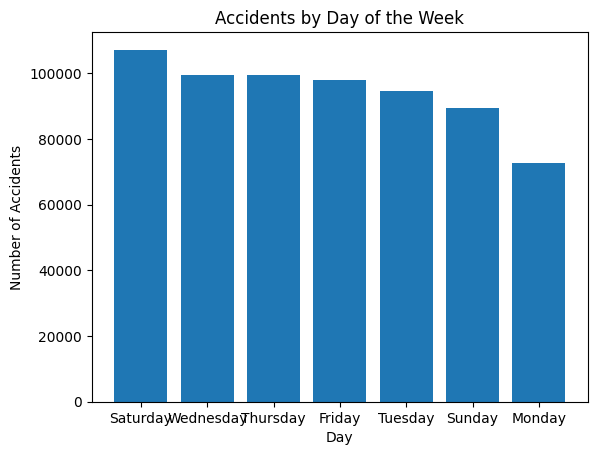

In [40]:
plt.bar(days, counts)
plt.title('Accidents by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Number of Accidents')

plt.show()

<h1>Insight 15</h1>
<h3>Accidents peak on Saturdays (107,178), with relatively high numbers also seen midweek (Wednesday and Thursday). Mondays have the fewest accidents (72,680). The weekend spike could be due to increased leisure travel, late-night driving, and alcohol-related incidents, while weekdays reflect regular commuting patterns.</h3>
<hr>

<h2>Question #16</h2>
<h3>Which month records the highest number of accidents?</h3>

In [41]:
accident['Month'] = accident['Accident Date'].dt.month_name()
accident['Month'].value_counts()

Month
November     60424
October      59580
July         57445
June         56481
September    56455
May          56352
March        54086
August       53913
January      52872
December     51836
April        51744
February     49491
Name: count, dtype: int64

<h1>Insight 16</h1>
<h3>November tops the list with 60,424 accidents, closely followed by October and July. By contrast, February has the lowest count at 49,491. The late autumn spike (October–November) could be explained by shorter daylight hours, adverse weather conditions, and holiday-related traffic, while the summer months also reflect high travel activity.</h3>
<hr>

<h2>Question #17</h2>
<h3>Is there a seasonal peak for accidents involving taxis/private hire cars?</h3>

In [42]:
taxi = accident[(accident['Vehicle_Type'] == 'Taxi') | (accident['Vehicle_Type'] == 'Taxi/Private hire car')]
taxi['Month'] = taxi['Accident Date'].dt.month_name()
taxi['Month'].value_counts()

Month
October      1238
June         1190
November     1172
September    1170
May          1161
July         1145
January      1081
March        1060
August       1050
April        1037
December     1037
February      953
Name: count, dtype: int64

<h1>Insight 17</h1>
<h3>Taxi and private hire car accidents peak in October (1,238) and June (1,190), while February records the fewest (953). This indicates that demand-driven factors (e.g., tourism, events, holiday travel) could influence accident frequency for this category of vehicles.</h3>
<hr>

In [43]:
accident['Weather_Conditions'].value_counts('Accident_Severity')

Weather_Conditions
Fine no high winds       0.788409
Raining no high winds    0.120627
Other                    0.025958
unaccounted              0.021384
Raining + high winds     0.014553
Fine + high winds        0.012947
Snowing no high winds    0.009442
Fog or mist              0.005340
Snowing + high winds     0.001340
Name: proportion, dtype: float64

<h2>Question #18</h2>
<h3>Has the number of accidents increased or decreased over the years?</h3>

In [44]:
yearly_accidents = accident.groupby("Year").size()

In [45]:
yearly_accidents

Year
2019    182115
2020    170591
2021    163554
2022    144419
dtype: int64

<h1>Insight 18</h1>
<h3>The data clearly shows a year-over-year decrease in the total number of recorded accidents from 2019 through 2022. This represents an overall decrease of approximately 21% in accident numbers over the four-year period.</h3>
<hr>

<h2>Question #19</h2>
<h3>Can accident severity be predicted based on vehicle type</h3>

In [46]:
accident.groupby('Vehicle_Type')['Accident_Severity'].value_counts()

Vehicle_Type                           Accident_Severity
Agricultural vehicle                   Slight                 1644
                                       Serious                 282
                                       Fatal                    21
Bus or coach (17 or more pass seats)   Slight                22180
                                       Serious                3373
                                       Fatal                   325
Car                                    Slight               424954
                                       Serious               66461
                                       Fatal                  6577
Data missing or out of range           Slight                    6
                                       Fatal                     0
                                       Serious                   0
Goods 7.5 tonnes mgw and over          Slight                14770
                                       Serious                2321
     

<h1>Insight 19</h1>
<h3>accident severity is influenced by vehicle type. Motorcycles — especially those with larger engines — are more likely to be involved in severe or fatal crashes, while cars tend to dominate in overall numbers but have a lower severity ratio.</h3>
<hr>

<h2>Question #20</h2>
<h3>Are severe accidents more common during specific months in rural areas?</h3>

In [47]:
rural = accident[accident['Urban_or_Rural_Area'] == 'Rural']
rural[rural['Accident_Severity'] == 'Serious']['Accident Date'].dt.month_name().value_counts()

Accident Date
August       3540
July         3486
June         3446
September    3423
May          3373
October      3199
April        3170
November     2991
March        2817
January      2698
December     2639
February     2530
Name: count, dtype: int64

<h1>Insight 20</h1>
<h3>the highest counts of severe rural accidents occur in summer months: August (3,540), July (3,486), and June (3,446). The lowest is February (2,530). This seasonal pattern could be explained by increased rural travel during summer holidays</h3>
<hr>

<h2>Question #21</h2>
<h3>Is there a stronger link between wet roads and accident severity in rural vs. urban areas?</h3>

In [48]:
wet = accident[accident['Road_Surface_Conditions'] == 'Wet or damp']
wet.groupby('Urban_or_Rural_Area')['Accident_Severity'].value_counts()

Urban_or_Rural_Area  Accident_Severity
Rural                Slight               65928
                     Serious              11318
                     Fatal                 1759
Unallocated          Slight                   4
                     Serious                  1
                     Fatal                    0
Urban                Slight               94371
                     Serious              12466
                     Fatal                  861
Name: count, dtype: int64

<h1>Insight 21</h1>
<h3>Rural areas see more fatal accidents (1759) than urban areas (861)
Serious accidents. Rural (11,318), Urban (12,466) — close, but note rural roads likely have less traffic. Wet roads are more strongly linked with fatal outcomes in rural areas, possibly due to higher speeds and fewer safety features.</h3>
<hr>

<h2>Question #22</h2>
<h3>Which districts have the most accidents involving buses compared to private vehicles?</h3>

In [49]:
bus = accident[accident['Vehicle_Type'] == 'Bus or coach (17 or more pass seats)']
bus['District Area'].value_counts().head(10)

District Area
Birmingham          570
Westminster         341
Sheffield           331
Liverpool           271
Bristol, City of    240
Glasgow City        229
Leeds               228
Newham              219
Manchester          205
Havering            199
Name: count, dtype: int64

In [50]:
car = accident[accident['Vehicle_Type'] == 'Car']
car['District Area'].value_counts().head(10)

District Area
Birmingham          9600
Leeds               6875
Manchester          5248
Bradford            4749
Sheffield           4306
Liverpool           4159
Glasgow City        3835
Westminster         3823
Bristol, City of    3611
Kirklees            3583
Name: count, dtype: int64

<h1>Insight 22</h1>
<h3>Bus accidents are most common in large urban centers like Birmingham, Westminster, and Sheffield, where public transport usage is highest.
Car accidents, however, are far more frequent overall, especially in Birmingham, Leeds, and Manchester, which reflects higher private vehicle ownership and usage.</h3>
<hr>

<h2>Question #23</h2>
<h3>Is there a stronger link between wet roads and accident severity in rural vs. urban areas?</h3>

In [51]:
wet = accident[accident['Road_Surface_Conditions'] == 'Wet or damp']
wet.groupby('Urban_or_Rural_Area')['Accident_Severity'].value_counts()

Urban_or_Rural_Area  Accident_Severity
Rural                Slight               65928
                     Serious              11318
                     Fatal                 1759
Unallocated          Slight                   4
                     Serious                  1
                     Fatal                    0
Urban                Slight               94371
                     Serious              12466
                     Fatal                  861
Name: count, dtype: int64

<h1>Insight 23</h1>
<h3>Wet road accidents occur in both rural and urban areas, but rural accidents show a higher share of fatal outcomes compared to urban ones. This indicates that poor road conditions and higher driving speeds in rural areas amplify the risks associated with wet or damp roads.</h3>
<hr>

<h2>Question #24</h2>
<h3>Are urban motorcycle accidents more severe compared to rural motorcycle accidents?</h3>

In [52]:
moto500 = accident[accident['Vehicle_Type'] == 'Motorcycle over 500cc']
moto500.groupby('Urban_or_Rural_Area')['Accident_Severity'].value_counts()

Urban_or_Rural_Area  Accident_Severity
Rural                Slight                7380
                     Serious               1355
                     Fatal                  222
Unallocated          Fatal                    0
                     Serious                  0
                     Slight                   0
Urban                Slight               14481
                     Serious               2102
                     Fatal                  117
Name: count, dtype: int64

In [53]:
moto125 = accident[accident['Vehicle_Type'] == 'Motorcycle 125cc and under']
moto125.groupby('Urban_or_Rural_Area')['Accident_Severity'].value_counts()

Urban_or_Rural_Area  Accident_Severity
Rural                Slight               4105
                     Serious               817
                     Fatal                 101
Unallocated          Fatal                   0
                     Serious                 0
                     Slight                  0
Urban                Slight               8944
                     Serious              1214
                     Fatal                  88
Name: count, dtype: int64

In [54]:
moto125_500 = accident[accident['Vehicle_Type'] == 'Motorcycle over 125cc and up to 500cc']
moto125_500.groupby('Urban_or_Rural_Area')['Accident_Severity'].value_counts()

Urban_or_Rural_Area  Accident_Severity
Rural                Slight               2211
                     Serious               399
                     Fatal                  64
Unallocated          Fatal                   0
                     Serious                 0
                     Slight                  0
Urban                Slight               4326
                     Serious               615
                     Fatal                  41
Name: count, dtype: int64

In [55]:
moto50 = accident[accident['Vehicle_Type'] == 'Motorcycle 50cc and under']
moto50.groupby('Urban_or_Rural_Area')['Accident_Severity'].value_counts()

Urban_or_Rural_Area  Accident_Severity
Rural                Slight               2227
                     Serious               431
                     Fatal                  52
Unallocated          Fatal                   0
                     Serious                 0
                     Slight                  0
Urban                Slight               4267
                     Serious               583
                     Fatal                  43
Name: count, dtype: int64

<h1>Insight 24</h1>
<h3>Urban motorcycle accidents occur in higher numbers, but rural accidents tend to have a higher severity (greater proportion of serious and fatal outcomes). This may be due to higher speeds on rural roads, slower emergency response times, and less protective infrastructure compared to urban settings.</h3>
<hr>

<h2>Question #25</h2>
<h3>Are accidents involving buses/coaches more likely to occur in daylight compared to other vehicle types?</h3>

In [56]:
bus = accident[(accident['Vehicle_Type'] == 'Bus') | (accident['Vehicle_Type'] == 'Coach')]
other = accident[(accident['Vehicle_Type'] != 'Bus') & (accident['Vehicle_Type'] != 'Coach')]
bus['Light_Conditions'].value_counts()
other['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       484880
Darkness - lights lit          129335
Darkness - no lighting          37437
Darkness - lighting unknown      6484
Darkness - lights unlit          2543
Name: count, dtype: int64

<h1>Insight 25</h1>
<h3>The majority of bus/coach accidents occur during daylight hours, more so than other vehicle types. This suggests that buses/coaches, which typically operate during daytime schedules (public transport, school runs, long-distance travel), are more prone to accidents when visibility is good but traffic density is also high.</h3>
<hr>

In [76]:
accident['District Area'].unique()

['Kensington and Chelsea', 'Westminster', 'Richmond upon Thames', 'Hammersmith and Fulham', 'Hounslow', ..., 'County Durham', 'Shropshire', 'Central Bedfordshire', 'Cornwall', 'Wiltshire']
Length: 422
Categories (422, object): ['Aberdeen City', 'Aberdeenshire', 'Adur', 'Allerdale', ..., 'Wycombe', 'Wyre', 'Wyre Forest', 'York']

In [78]:
Shropshire_ac = accident[accident['District Area']== 'Shropshire']

In [79]:
Shropshire_fatal = Shropshire_ac[Shropshire_ac['Accident_Severity'] == 'Fatal']

In [81]:
import folium
from folium.plugins import HeatMap
locations  = list(zip(Shropshire_fatal['Latitude'],Shropshire_fatal['Longitude']))
m = folium.Map(location=[Shropshire_fatal['Latitude'].mean(), Shropshire_fatal['Longitude'].mean()], zoom_start=10)
HeatMap(locations).add_to(m)
m.save('accident_heatmap.html')
m

In [95]:
accident.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                 category
District Area                    category
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
Year                                int32
Month                              object
Day                                 int32
DayOfWeek                           int32
Day_of_Week                        object
dtype: object

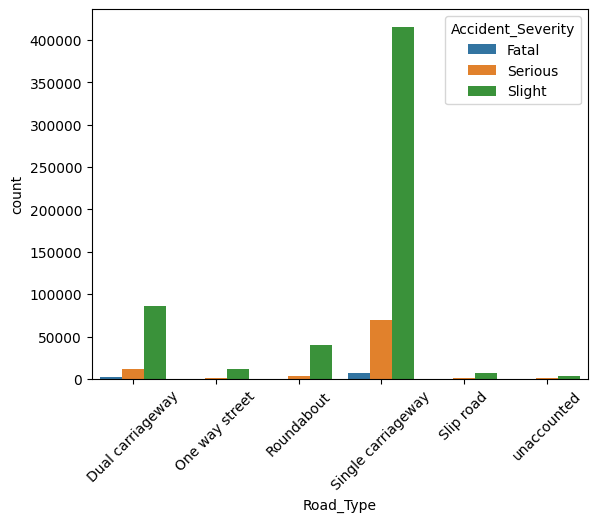

In [101]:
sns.countplot(
    x='Road_Type',
    hue='Accident_Severity',
    data=accident
)
plt.xticks(rotation=45)
plt.show()

<h1>Insight 26</h1>
<h3>The chart shows that most accidents occur on single carriageways. These are mainly minor accidents, followed by serious ones, and then fatal accidents. This is logical because single carriageways are the most common type of road and usually lack dividers to separate traffic. Dual carriageways have fewer accidents, likely due to safety features like central barriers, even though cars travel faster on these roads. but most are minor because traffic moves slower there, which lowers the chance of serious crashes. One-way streets and slip roads have very few accidents, probably because they are shorter and more controlled. In general, minor accidents are the most frequent on all road types. However, since serious and fatal accidents still occur often on single carriageways, these roads need the most focus for safety improvements.</h3>
<hr>

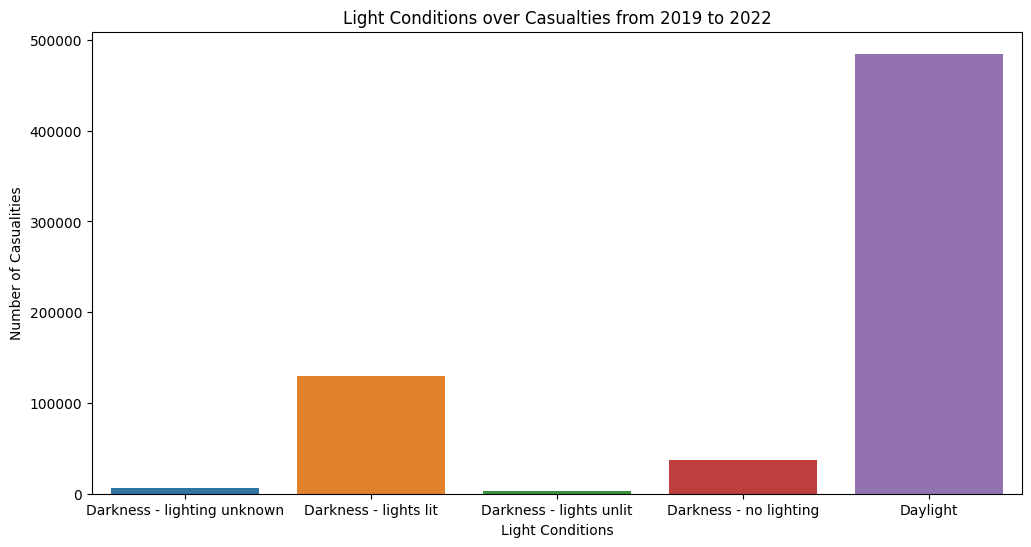

In [119]:
road_casualties = accident.groupby(['Light_Conditions'])['Number_of_Casualties'].size().reset_index()
road_casualties

plt.figure(figsize=(12, 6))
sns.barplot(data=road_casualties, x='Light_Conditions', y='Number_of_Casualties', hue='Light_Conditions')
plt.xlabel('Light Conditions')
plt.ylabel('Number of Casualities')
plt.title('Light Conditions over Casualties from 2019 to 2022')
plt.show()

<h1>Insight 27</h1>
<h3>The chart shows that most road accident casualties from 2019 to 2022 occurred during daylight. The numbers were much higher than in any other light condition. This likely happens because more people travel during the day, increasing the chance of accidents, even with better visibility. At night, when street lights were on, there were still many casualties, but the number was much lower compared to daylight. Accidents were even fewer when it was dark with no lighting. This may be because fewer vehicles are on the road in those conditions. Overall, the chart suggests that while driving at night can be dangerous, the high number of accidents during the day may results from heavier traffic and more exposure.</h3>
<hr>

In [108]:
Shropshire_ac = accident[accident['District Area']== 'Shropshire']

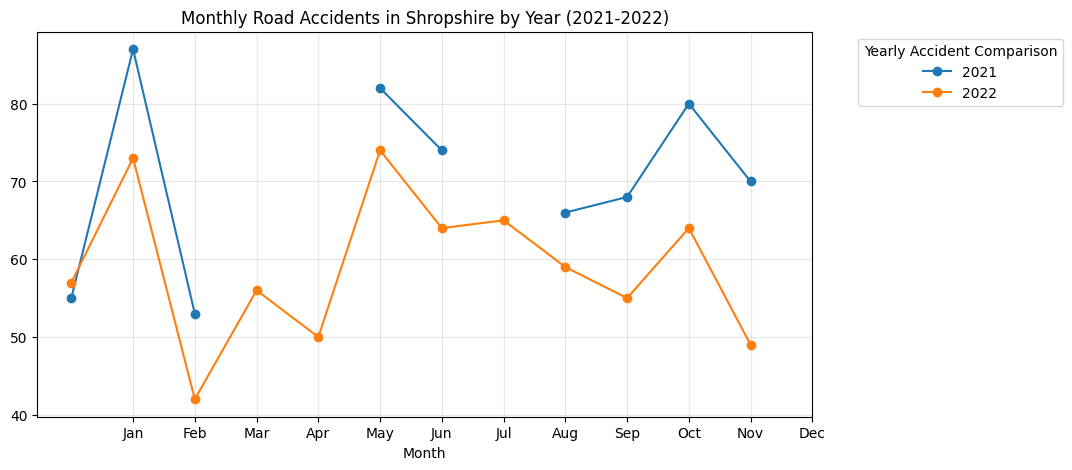

In [111]:
monthly_Shropshire = Shropshire_ac.groupby(['Year', 'Month']).size()

monthly_Shropshire = monthly_Shropshire.unstack(level=0)

monthly_Shropshire.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Shropshire by Year (2021-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

<h1>Insight 28</h1>
<h3>The chart shows that Shropshire had more road accidents in 2021 than in 2022. In 2022, the number of accidents was lower almost every month. In both years, accidents were highest in January. They dropped in February, then rise again around May and June, and increased once more in September and October. January 2021 had the most accidents overall, while February was the calmest month in both years. Although the monthly pattern appears similar, the fact that accidents remained lower in 2022 suggests that things may have improved, such as safer driving, better road conditions, or fewer cars on the road.</h3>
<hr>

<h1>Based on question no. 5</h1>

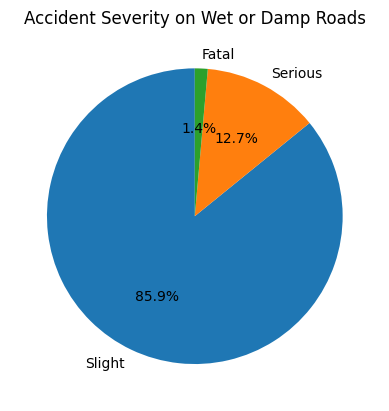

In [87]:
wets = ['Slight', 'Serious', 'Fatal']
wet_sev = [160303, 23785, 2620]

plt.pie(wet_sev, 
        labels=wets, 
        autopct='%1.1f%%', 
        startangle=90,)
plt.title('Accident Severity on Wet or Damp Roads')
plt.show()

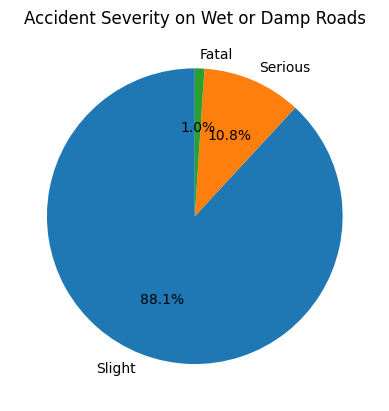

In [88]:
ice = ['Slight', 'Serious', 'Fatal']
icy_sev = [16317, 2007, 193]

plt.pie(icy_sev, 
        labels=ice, 
        autopct='%1.1f%%', 
        startangle=90,)
plt.title('Accident Severity on Wet or Damp Roads')
plt.show()

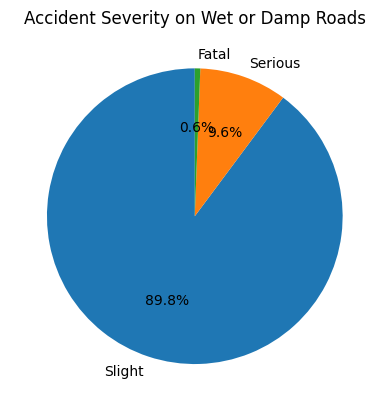

In [89]:
snowy = ['Slight', 'Serious', 'Fatal']
snowy_sev = [5290, 565, 35]

plt.pie(snowy_sev, 
        labels=snowy, 
        autopct='%1.1f%%', 
        startangle=90,)
plt.title('Accident Severity on Wet or Damp Roads')
plt.show()

<h1>Insight 29</h1>
<h3>On snowy roads, most accidents are slight, making up nearly 90%. Serious accidents account for about 10%, while fatal accidents are less than 1%. This shows that while snow increases risks, most crashes are not deadly but still need attention.</h3>
<hr>

<h1>Insight 30</h1>
<h3>On icy roads, minor accidents make up about 88%, while serious accidents account for around 11% and fatal accidents are about 1%. This shows that icy roads are more dangerous and harder to manage, resulting in more severe crashes.</h3>
<hr>

<h1>Insight 31</h1>
<h3>On wet roads, minor accidents are the most common at about 86%. Serious accidents increase to nearly 13%, while fatal accidents stand at around 1.4%. Since wet roads are frequent, the higher rates of serious and fatal accidents show that these conditions pose serious risks, especially during heavy rain.</h3>
<hr>